# import libraries

In [274]:
import numpy as np
import pandas as pd
import math 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.style.use('ggplot')


# load dataset

In [233]:
df=pd.read_csv('dataset/car-em.csv', encoding = "ISO-8859-1")


# exploring data


In [235]:
df.shape


(5118, 34)

In [236]:
df.sample(10)

,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),...,Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
604,SEAT,Leon 5 Door,1.6 TDI 115PS 7speed DSG SE Technology,D7,1598.0,Diesel,NaN,NaN,NaN,NaN,...,47.0,69.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2379,MINI,"Countryman R60, From September 2010",MINI Cooper SD ALL4 - 17'' tyres,A6,1995.0,Diesel,NaN,NaN,NaN,NaN,...,59.0,114.0,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2582,NISSAN,"Leaf, 2016",Leaf 24kWh,NaN,NaN,Electricity,4.1,150.0,199.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2688,FORD,"Fiesta, Model Year Pre 2017¼",1.0 EcoBoost (100PS) Stop-Start,M5,998.0,Petrol,NaN,NaN,NaN,NaN,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4290,BMW,"4 Series Coupé F32, From March 2016",420i xDrive - 18'' & 19'' tyres,M6,1998.0,Petrol,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3204,MERCEDES-BENZ,"A-Class, Model Year 2018",A 160 with 18'' rear wheels,M6,1595.0,Petrol,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,KIA,Niro,'2' 1.6 GDi 139bhp DCT,DCT6,1580.0,Petrol,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,AUDI,A3 Sportback,1.6 TDI 116PS 7speed S-tronic 16'' wheels,D7,1598.0,Diesel,NaN,NaN,NaN,NaN,...,40.0,66.0,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4095,SKODA,Superb Saloon,"2.0 TSI 220PS DSG Stop-Start SE L, Executive, ...",D6,1984.0,Petrol,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,PEUGEOT,5008,BlueHDi 120 S&S Auto (18'' wheels),A6,1560.0,Diesel,NaN,NaN,NaN,NaN,...,39.0,47.0,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
df.columns

Index(['Manufacturer', 'Model', 'Description', 'Transmission',
       'Engine Capacity', 'Fuel Type', 'Electric energy consumption Miles/kWh',
       'wh/km', 'Maximum range (Km)', 'Maximum range (Miles)',
       'Metric Urban (Cold)', 'Metric Extra-Urban', 'Metric Combined',
       'Imperial Urban (Cold)', 'Imperial Extra-Urban', 'Imperial Combined',
       'CO2 g/km', 'Fuel Cost 12000 Miles', 'Electricity cost',
       'Total cost / 12000 miles', 'Euro Standard', 'Noise Level dB(A)',
       'Emissions CO [mg/km]', 'THC Emissions [mg/km]',
       'Emissions NOx [mg/km]', 'THC + NOx Emissions [mg/km]',
       'Particulates [No.] [mg/km]', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33'],
      dtype='object')

# cleaning data

In [238]:
#drop some columns
drop_col = ['Model', 'Description', 'Transmission','wh/km', 'Maximum range (Km)', 'Maximum range (Miles)',
       'Metric Urban (Cold)', 'Metric Extra-Urban', 'Metric Combined',
       'Imperial Urban (Cold)', 'Imperial Extra-Urban', 'Imperial Combined','Fuel Cost 12000 Miles', 'Electricity cost',
       'Total cost / 12000 miles','Noise Level dB(A)','Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33']

df=df.drop(drop_col, axis=1) 
df.columns

Index(['Manufacturer', 'Engine Capacity', 'Fuel Type',
       'Electric energy consumption Miles/kWh', 'CO2 g/km', 'Euro Standard',
       'Emissions CO [mg/km]', 'THC Emissions [mg/km]',
       'Emissions NOx [mg/km]', 'THC + NOx Emissions [mg/km]',
       'Particulates [No.] [mg/km]'],
      dtype='object')

In [239]:
#remove columns spaces
df.columns=df.columns.str.replace(' ','')

In [240]:
# check no. fo nulls in columns
df.isnull().sum()

Manufacturer                             0
EngineCapacity                          30
FuelType                                 0
ElectricenergyconsumptionMiles/kWh    5037
CO2g/km                                  0
EuroStandard                             0
EmissionsCO[mg/km]                      30
THCEmissions[mg/km]                   2611
EmissionsNOx[mg/km]                     30
THC+NOxEmissions[mg/km]               2536
Particulates[No.][mg/km]              2529
dtype: int64

In [241]:
#drop some columns
drop_col = ['ElectricenergyconsumptionMiles/kWh']

df=df.drop(drop_col, axis=1) 
df.columns

Index(['Manufacturer', 'EngineCapacity', 'FuelType', 'CO2g/km', 'EuroStandard',
       'EmissionsCO[mg/km]', 'THCEmissions[mg/km]', 'EmissionsNOx[mg/km]',
       'THC+NOxEmissions[mg/km]', 'Particulates[No.][mg/km]'],
      dtype='object')

In [242]:
#calculate the mean of the EngineCapacity column
df['EngineCapacity'].mean()
#fill all the empties/nulls in EngineCapacity column with mean
df['EngineCapacity'] = df['EngineCapacity'].fillna(df['EngineCapacity'].mean())


In [243]:
#calculate the mean of the EmissionsCO[mg/km] column
df['EmissionsCO[mg/km]'].mean()
#fill all the empties/nulls in EmissionsCO[mg/km] column with mean
df['EmissionsCO[mg/km]'] = df['EmissionsCO[mg/km]'].fillna(df['EmissionsCO[mg/km]'].mean())


In [244]:
#calculate the mean of the THCEmissions[mg/km] column
df['THCEmissions[mg/km]'].mean()
#fill all the empties/nulls in THCEmissions[mg/km] column with mean
df['THCEmissions[mg/km]'] = df['THCEmissions[mg/km]'].fillna(df['THCEmissions[mg/km]'].mean())


In [245]:
#calculate the mean of the THC+NOxEmissions[mg/km] column
df['THC+NOxEmissions[mg/km]'].mean()
#fill all the empties/nulls in THCEmissions[mg/km] column with mean
df['THC+NOxEmissions[mg/km]'] = df['THC+NOxEmissions[mg/km]'].fillna(df['THC+NOxEmissions[mg/km]'].mean())

In [246]:
#calculate the mean of the Particulates[No.][mg/km] column
df['Particulates[No.][mg/km]'].mean()
#fill all the empties/nulls in THCEmissions[mg/km] column with mean
df['Particulates[No.][mg/km]'] = df['Particulates[No.][mg/km]'].fillna(df['Particulates[No.][mg/km]'].mean())

In [247]:
df.sample(10)

,Manufacturer,EngineCapacity,FuelType,CO2g/km,EuroStandard,EmissionsCO[mg/km],THCEmissions[mg/km],EmissionsNOx[mg/km],THC+NOxEmissions[mg/km],Particulates[No.][mg/km]
2750,AUDI,999.0,Petrol,103,6,183.0,48.00000,23.0,79.331526,0.316748
1694,VOLKSWAGEN,1968.0,Diesel,117,6,183.0,41.69645,64.0,93.000000,0.000000
2782,CITROEN,1199.0,Petrol,105,6,371.0,42.00000,18.0,79.331526,0.390000
4700,AUDI,3993.0,Petrol,220,6,673.0,47.00000,24.0,79.331526,0.316748
4436,MINI,1998.0,Petrol,152,6,393.0,20.00000,41.0,79.331526,0.316748
2696,NISSAN,898.0,Petrol,99,6,301.0,59.00000,41.0,79.331526,0.316748
3035,BMW,1499.0,Petrol,123,6,164.0,41.00000,16.0,79.331526,0.316748
1669,VOLKSWAGEN,1968.0,Diesel,130,6,103.0,41.69645,55.0,89.000000,0.000000
4651,MINI,1598.0,Petrol,179,6,550.0,57.00000,18.0,79.331526,0.316748
4220,AUDI,1984.0,Petrol,152,6,488.0,38.00000,14.0,79.331526,0.316748


In [248]:
#drop duplicated rows - if any
df=df.drop_duplicates(keep='first')

In [249]:
df.shape

(3356, 10)

In [250]:
#check if there’s any empties existing in the whole dataset or not.
df.isnull().values.any()

True

In [251]:
#calculate the mean of the Particulates[No.][mg/km] column
df['EmissionsNOx[mg/km]'].mean()
#fill all the empties/nulls in THCEmissions[mg/km] column with mean
df['EmissionsNOx[mg/km]'] = df['EmissionsNOx[mg/km]'].fillna(df['EmissionsNOx[mg/km]'].mean())

In [252]:
# check no. fo nulls in columns
df.isnull().sum()

Manufacturer                0
EngineCapacity              0
FuelType                    0
CO2g/km                     0
EuroStandard                0
EmissionsCO[mg/km]          0
THCEmissions[mg/km]         0
EmissionsNOx[mg/km]         0
THC+NOxEmissions[mg/km]     0
Particulates[No.][mg/km]    0
dtype: int64

In [253]:
#combining emmissions columns into one column
df['Emissions'] = df['CO2g/km'] + df['EmissionsCO[mg/km]'] + df['THCEmissions[mg/km]'] + df['EmissionsNOx[mg/km]'] + df['THC+NOxEmissions[mg/km]'] + df['Particulates[No.][mg/km]']


In [254]:
df.head()

,Manufacturer,EngineCapacity,FuelType,CO2g/km,EuroStandard,EmissionsCO[mg/km],THCEmissions[mg/km],EmissionsNOx[mg/km],THC+NOxEmissions[mg/km],Particulates[No.][mg/km],Emissions
0,ALFA ROMEO,1248.0,Diesel,89,6,234.0,41.69645,67.0,100.0,0.27,531.96645
1,BMW,1496.0,Diesel,89,6,119.0,41.69645,37.0,66.0,0.14,352.83645
3,CITROEN,1560.0,Diesel,86,6,272.0,41.69645,55.0,74.0,0.42,529.11645
4,CITROEN,1560.0,Diesel,89,6,185.0,41.69645,40.0,53.0,0.03,408.72645
5,DACIA,1461.0,Diesel,90,6,271.0,41.69645,31.0,98.0,0.01,531.70645


In [255]:
#drop all the useless columns from the dataframe
drop_col = ['CO2g/km','EmissionsCO[mg/km]', 'THCEmissions[mg/km]', 'EmissionsNOx[mg/km]',
       'THC+NOxEmissions[mg/km]', 'Particulates[No.][mg/km]']

df=df.drop(drop_col, axis=1) 
df.columns

Index(['Manufacturer', 'EngineCapacity', 'FuelType', 'EuroStandard',
       'Emissions'],
      dtype='object')

In [256]:
df.sample(10)

,Manufacturer,EngineCapacity,FuelType,EuroStandard,Emissions
4017,MINI,1998.0,Petrol,6,946.648274
2920,VOLKSWAGEN,999.0,Petrol,6,558.648274
551,MINI,1496.0,Diesel,6,466.096450
4736,CHRYSLER JEEP,2359.0,Petrol,6,700.648274
2442,VOLKSWAGEN C.V.,1968.0,Diesel,6,441.696450
936,BMW,1995.0,Diesel,6,488.796450
1900,BMW,1995.0,Diesel,6,378.876450
129,KIA,1582.0,Diesel,6,580.846450
4871,BENTLEY MOTORS,3993.0,Petrol,6,816.648274
4801,MERCEDES-BENZ,2996.0,Petrol,6,661.648274


In [257]:
df=df.drop('EuroStandard', axis=1) 
df.columns

Index(['Manufacturer', 'EngineCapacity', 'FuelType', 'Emissions'], dtype='object')

In [258]:
len(df.FuelType.unique())

8

In [259]:
FuelType=df.groupby('FuelType')['FuelType'].agg('count')
FuelType

FuelType
Diesel                  1667
Diesel Electric            9
Electricity                9
Electricity / Diesel       5
Electricity / Petrol      37
Petrol                  1577
Petrol Electric            8
Petrol Hybrid             44
Name: FuelType, dtype: int64

## Handling Categorical Data 
### Label Encoder

In [260]:
encoder = LabelEncoder()
df['FuelType'] = encoder.fit_transform(df['FuelType'])

df.head(10)

,Manufacturer,EngineCapacity,FuelType,Emissions
0,ALFA ROMEO,1248.0,0,531.96645
1,BMW,1496.0,0,352.83645
3,CITROEN,1560.0,0,529.11645
4,CITROEN,1560.0,0,408.72645
5,DACIA,1461.0,0,531.70645
6,DACIA,1461.0,0,414.69645
7,DS,1560.0,0,411.77645
8,FIAT,1248.0,0,433.96645
9,FIAT,1598.0,0,484.77645
11,FORD,1499.0,0,465.66645


### one-hot-encoder

In [261]:

FuelType_dummies = pd.get_dummies(df['FuelType'])
FuelType_dummies.columns=['Diesel','Diesel Electric','Electricity','Electricity / Diesel','Electricity / Petrol','Petrol','Petrol Electric','Petrol Hybrid']



In [262]:
#add all the new columns to our dataset
df = pd.concat([df,FuelType_dummies],axis=1)


In [263]:
df.columns

Index(['Manufacturer', 'EngineCapacity', 'FuelType', 'Emissions', 'Diesel',
       'Diesel Electric', 'Electricity', 'Electricity / Diesel',
       'Electricity / Petrol', 'Petrol', 'Petrol Electric', 'Petrol Hybrid'],
      dtype='object')

In [264]:
#remove columns spaces
df.columns=df.columns.str.replace(' ','')

In [265]:
df.sample(10)

,Manufacturer,EngineCapacity,FuelType,Emissions,Diesel,DieselElectric,Electricity,Electricity/Diesel,Electricity/Petrol,Petrol,PetrolElectric,PetrolHybrid
926,BMW,1995.0,0,400.796450,1,0,0,0,0,0,0,0
775,AUDI,1968.0,0,454.696450,1,0,0,0,0,0,0,0
4007,MINI,1998.0,5,741.648274,0,0,0,0,0,1,0,0
3945,MERCEDES-BENZ,1991.0,5,685.648274,0,0,0,0,0,1,0,0
5027,PORSCHE,3996.0,5,573.648274,0,0,0,0,0,1,0,0
2452,VOLKSWAGEN C.V.,1968.0,0,546.906450,1,0,0,0,0,0,0,0
1922,BMW,2993.0,0,552.696450,1,0,0,0,0,0,0,0
1025,BMW,1995.0,0,339.716450,1,0,0,0,0,0,0,0
936,BMW,1995.0,0,488.796450,1,0,0,0,0,0,0,0
3303,NISSAN,1198.0,5,355.648274,0,0,0,0,0,1,0,0


In [266]:
#drop all the useless columns from the dataframe
drop_col = ['Manufacturer','FuelType']

df=df.drop(drop_col, axis=1) 
df.columns

Index(['EngineCapacity', 'Emissions', 'Diesel', 'DieselElectric',
       'Electricity', 'Electricity/Diesel', 'Electricity/Petrol', 'Petrol',
       'PetrolElectric', 'PetrolHybrid'],
      dtype='object')

## Ploting the graph¶


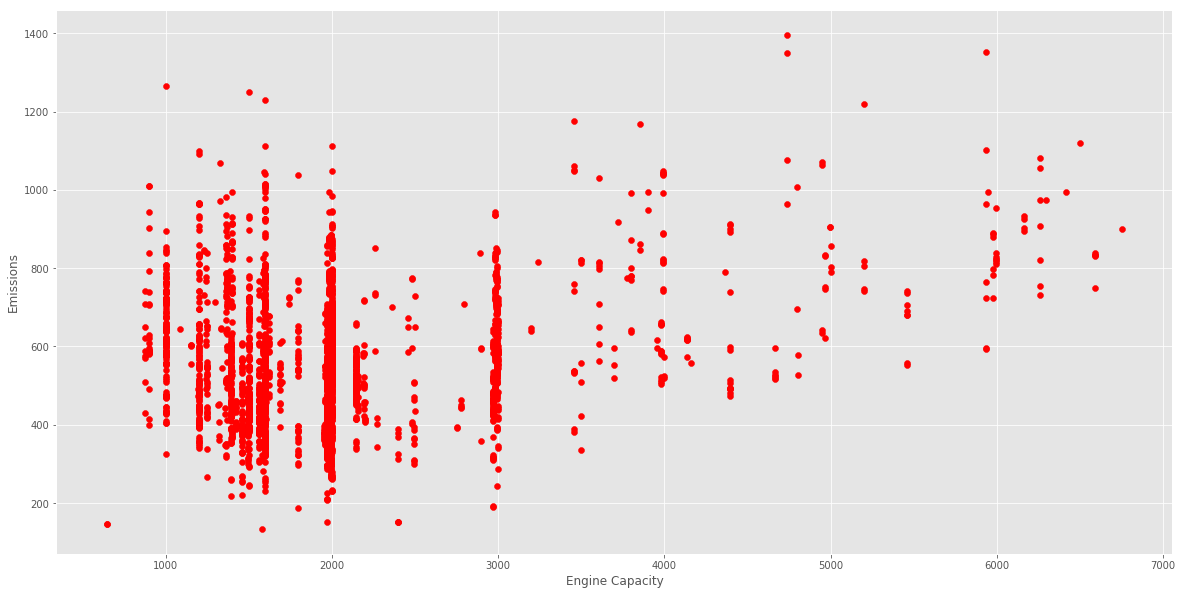

In [272]:
plt.scatter(df.EngineCapacity,df.Emissions, color="red")
plt.xlabel("Engine Capacity")
plt.ylabel("Emissions")
plt.show()

## Splitting the train and test dataset¶


In [286]:
features = df[['EngineCapacity']]
goal = df['Emissions']
# split the data
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(features, goal, test_size =1/3, random_state = 0)

## Modeling

In [287]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_set, goal_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## predictions

In [289]:
goal_predict = model.predict(test_set)
goal_predict

array([740.31639106, 514.40278676, 572.18633753, ..., 548.7605737 ,
       594.5412093 , 549.92070677])

## Plotting the graph with best fit line

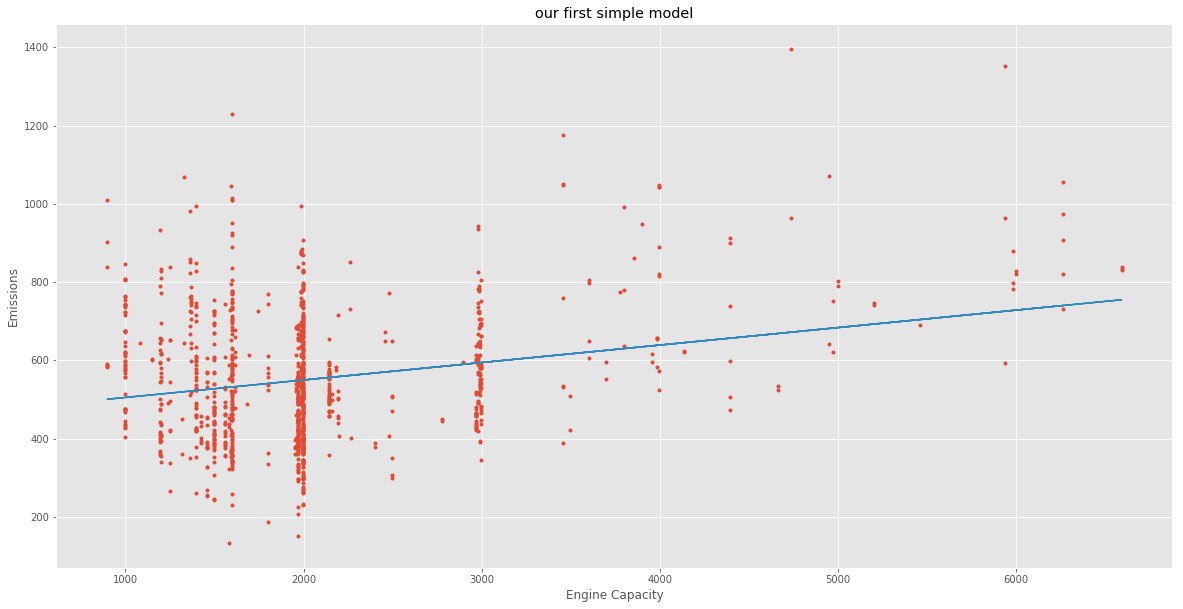

In [291]:
plt.plot(test_set, goal_test,'.', test_set, goal_predict, '-')
plt.title('our first simple model')
plt.xlabel('Engine Capacity')
plt.ylabel('Emissions')
plt.show()